In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sample_sub = pd.read_csv('sales_submission.csv')
sample_sub.head()

,st_id,pr_sku_id,date,target
0,16a5cdae362b8d27a1d8f8c7b78b4330,0045ebdb1069ff4b3dd3efe628c39cd3,2023-07-20,0
1,16a5cdae362b8d27a1d8f8c7b78b4330,00661699f543753ec7e911a64b9fd2f6,2023-07-20,0
2,16a5cdae362b8d27a1d8f8c7b78b4330,0094042bfeae507dc7f62acc8e5ed03a,2023-07-20,0
3,16a5cdae362b8d27a1d8f8c7b78b4330,0169529ff660adcac9b7e354e0c4b882,2023-07-20,0
4,16a5cdae362b8d27a1d8f8c7b78b4330,01e4734745e97e52d3213449e1a05dd7,2023-07-20,0


In [6]:
sample_sub['date'] = pd.to_datetime(sample_sub['date']).dt.normalize()
sample_sub['date'].describe()

count                  43694
mean     2023-07-25 12:00:00
min      2023-07-19 00:00:00
25%      2023-07-22 00:00:00
50%      2023-07-25 12:00:00
75%      2023-07-29 00:00:00
max      2023-08-01 00:00:00
Name: date, dtype: object

In [7]:
sample_sub['date'].value_counts()

date
2023-07-20    3121
2023-07-21    3121
2023-07-22    3121
2023-07-24    3121
2023-07-25    3121
2023-07-26    3121
2023-07-27    3121
2023-07-28    3121
2023-07-19    3121
2023-07-23    3121
2023-07-29    3121
2023-07-30    3121
2023-07-31    3121
2023-08-01    3121
Name: count, dtype: int64

In [4]:
sample_sub.shape

(43694, 4)

In [5]:
sample_sub['st_id'].nunique(), sample_sub['pr_sku_id'].nunique(), sample_sub['date'].nunique()

(8, 1087, 14)

Прогноз для 8 магазинов и 1087 товаров на две недели. Не все товары есть во всех магазинах (в этом случае строк было бы в три раза больше)

In [6]:
stores = pd.read_csv('st_df.csv')
stores.head()

,st_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
0,1aa057313c28fa4a40c5bc084b11d276,1587965fb4d4b5afe8428a4a024feb0d,81b4dd343f5880df806d4c5d4a846c64,4,3,19,0
1,bd470ca955d9497bbcb808e59952fffc,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,19,1
2,6364d3f0f495b6ab9dcf8d3b5c6e0b01,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
3,1ecfb463472ec9115b10c292ef8bc986,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,2,1,28,1
4,16a5cdae362b8d27a1d8f8c7b78b4330,c1f75cc0f7fe269dd0fd9bd5e24f9586,296bd0cc6e735f9d7488ebc8fbc19130,1,2,8,1


In [7]:
for col in stores.columns:
  print(col, '-', stores[col].nunique())

st_id - 12
st_city_id - 7
st_division_code - 6
st_type_format_id - 3
st_type_loc_id - 3
st_type_size_id - 6
st_is_active - 2


In [58]:
def check_sets(df1, col1, df2, col2, name1='first', name2='second'):
    set1 = set(df1[col1].unique())
    set2 = set(df2[col2].unique())
    print('in both files:', len(set1 & set2))
    print(f'in {name1} but not in {name2}:', len(set1 - set2))
    print(f'in {name2} but not in {name1}:', len(set2 - set1))

In [8]:
stores_sub = set(sample_sub['st_id'].unique())
stores_total = set(stores['st_id'].unique())
print('in both files:', len(stores_sub & stores_total), '\n', stores_sub & stores_total)
print('in total but not in sub:', len(stores_total - stores_sub), '\n', stores_total - stores_sub)

in both files: 8 
 {'53e19f3dbb211f20b20b45668303c1b6', '16a5cdae362b8d27a1d8f8c7b78b4330', 'fa7cdfad1a5aaf8370ebeda47a1ff1c3', '6364d3f0f495b6ab9dcf8d3b5c6e0b01', 'c81e728d9d4c2f636f067f89cc14862c', '42a0e188f5033bc65bf8d78622277c4e', 'f7e6c85504ce6e82442c770f7c8606f0', '1ecfb463472ec9115b10c292ef8bc986'}
in total but not in sub: 4 
 {'084a8a9aa8cced9175bd07bc44998e75', 'bd470ca955d9497bbcb808e59952fffc', '1aa057313c28fa4a40c5bc084b11d276', '62f91ce9b820a491ee78c108636db089'}


In [59]:
check_sets(stores, 'st_id', sample_sub, 'st_id', 'total', 'sub')

in both files: 8
in total but not in sub: 4
in sub but not in total: 0


In [9]:
stores[stores['st_is_active'] == 0]

,st_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
0,1aa057313c28fa4a40c5bc084b11d276,1587965fb4d4b5afe8428a4a024feb0d,81b4dd343f5880df806d4c5d4a846c64,4,3,19,0
10,62f91ce9b820a491ee78c108636db089,1587965fb4d4b5afe8428a4a024feb0d,81b4dd343f5880df806d4c5d4a846c64,4,3,32,0


Из 12 магазинов 8 попали в прогноз. Из оставшихся четырех два неактивны

Магазины расположены в 7 городах 6 разных дивизонов

In [10]:
for city in stores['st_city_id'].unique():
  print(city)
  display(stores[stores['st_city_id'] == city][['st_type_format_id', 'st_type_loc_id', 'st_type_size_id', 'st_is_active']])

1587965fb4d4b5afe8428a4a024feb0d


,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
0,4,3,19,0
10,4,3,32,0


955d864a62659945cc9434898e275deb


,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
1,4,3,19,1
5,4,3,20,1


b8b4b727d6f5d1b61fff7be687f7970f


,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
2,1,1,12,1
6,1,1,12,1


908c9a564a86426585b29f5335b619bc


,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
3,2,1,28,1
7,1,1,8,1


c1f75cc0f7fe269dd0fd9bd5e24f9586


,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
4,1,2,8,1


885fe656777008c335ac96072a45be15


,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
8,1,1,12,1


3202111cf90e7c816a472aaceb72b0df


,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
9,1,1,12,1
11,4,3,19,1


В каждом городе 1 либо 2 магазина

Оба неактивных магазина - в одном городе

Формат 2 и тип локации 2 представлены только по одному разу

Размеры 20, 28 и 32 (очевидно более крупные) представлены по одному разу

In [11]:
items = pd.read_csv('pr_df.csv')
items.head()

,pr_sku_id,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id
0,fd064933250b0bfe4f926b867b0a5ec8,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17
1,71c9661741caf40a92a32d1cc8206c04,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17
2,00b72c2f01a1512cbb1d3f33319bac93,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,d407a3ebb4ab9b0d68b224486f8b8dad,17
3,9bc40cd2fe4f188f402bb41548c5e15c,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17
4,3a74a370c8eb032acb11ad9119242b8f,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17


In [12]:
for col in items.columns:
  print(col, '-', items[col].nunique())

pr_sku_id - 2050
pr_group_id - 9
pr_cat_id - 43
pr_subcat_id - 170
pr_uom_id - 2


In [13]:
items['pr_uom_id'].unique()

array([17,  1], dtype=int64)

In [14]:
type17 = items[items['pr_uom_id']==17]['pr_sku_id'].unique()
type1 = items[items['pr_uom_id']==1]['pr_sku_id'].unique()
print(f'{len(type17)} ids in type 17, {len(type1)} ids in type 1')

771 ids in type 17, 1279 ids in type 1


In [15]:
items_insub = sample_sub['pr_sku_id'].unique()
insub_type17 = sum([1 for id in type17 if id in items_insub])
insub_type1 = sum([1 for id in type1 if id in items_insub])
print(f'Out of {len(type17)} items in type 17 {insub_type17} ({round(insub_type17 * 100 / len(type17))}%) are in sample submission')
print(f'Out of {len(type1)} items in type 1 {insub_type1} ({round(insub_type1 * 100 / len(type1))}%) are in sample submission')

Out of 771 items in type 17 416 (54%) are in sample submission
Out of 1279 items in type 1 671 (52%) are in sample submission


В задании сказано, что мы предсказываем спрос в штуках, но в тестовой выборке примерно поровну товаров, продающихся в штуках и на вес

Понять, какой из кодов 17 и 1 штуки, а какой на вес, пока невозможно. Нужно посмотреть на продажи

In [16]:
gr_cat_sub_it = []
for groupnum, group in enumerate(items['pr_group_id'].unique()):
  cat_sub_it = []
  cats = items[items['pr_group_id'] == group]['pr_cat_id'].unique()
  for catnum, cat in enumerate(cats):
    sub_it = []
    subcats = items[(items['pr_group_id'] == group) & (items['pr_cat_id'] == cat)]['pr_subcat_id'].unique()
    for subnum, subcat in enumerate(subcats):
      skus = items[(items['pr_group_id'] == group) & (items['pr_cat_id'] == cat) &
       (items['pr_subcat_id'] == subcat)]['pr_sku_id'].unique()
      sub_it.append(len(skus))
    cat_sub_it.append(sub_it)
  gr_cat_sub_it.append(cat_sub_it)
for groupnum, group in enumerate(items['pr_group_id'].unique()):
  cats = len(gr_cat_sub_it[groupnum])
  subcats = sum(len(x) for x in gr_cat_sub_it[groupnum])
  skus = sum(sum(x) for x in gr_cat_sub_it[groupnum])
  print(f'group {groupnum} contains {cats} categories, {subcats} subcategories and {skus} items')

group 0 contains 10 categories, 57 subcategories and 806 items
group 1 contains 6 categories, 14 subcategories and 203 items
group 2 contains 9 categories, 46 subcategories and 717 items
group 3 contains 2 categories, 9 subcategories and 73 items
group 4 contains 9 categories, 30 subcategories and 182 items
group 5 contains 3 categories, 5 subcategories and 27 items
group 6 contains 1 categories, 6 subcategories and 37 items
group 7 contains 2 categories, 2 subcategories and 4 items
group 8 contains 1 categories, 1 subcategories and 1 items


In [57]:
gr_cat_sub_it[0][0][0]

43

In [17]:
items['pr_group_id'].unique()[-2:]

array(['98f13708210194c475687be6106a3b84',
       '3c59dc048e8850243be8079a5c74d079'], dtype=object)

In [18]:
group7and8_items = items[items['pr_group_id'].isin(['98f13708210194c475687be6106a3b84',
       '3c59dc048e8850243be8079a5c74d079'])]['pr_sku_id'].unique()
[(item in items_insub) for item in group7and8_items]

[True, False, False, False, False]

Я просто подумала, что если нам не нужно предсказывать товары редких 7 и 8 групп, можно их вообще не учитывать. Но один из 5 есть в сабмишне. Кроме того, заказчик может в дальнейшем запросить прогноз для этих товаров. Плохая идея что-то выбрасывать

In [19]:
sales = pd.read_csv('sales_df_train.csv')
sales.shape

(883015, 8)

In [20]:
sales.head()

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0


In [21]:
for col in sales.columns[:3]:
  print(col, '-', sales[col].nunique())

st_id - 12
pr_sku_id - 1991
date - 352


In [61]:
check_sets(stores, 'st_id', sales, 'st_id', 'total', 'sales')

in both files: 12
in total but not in sales: 0
in sales but not in total: 0


In [63]:
check_sets(items, 'pr_sku_id', sales, 'pr_sku_id', 'total', 'sales')

in both files: 1991
in total but not in sales: 59
in sales but not in total: 0


У нас есть неполный год наблюдений, те же 12 магазинов, что в таблице с магазинами, и 1991 товар из 2050

In [24]:
sales['pr_sales_type_id'].mean()

0.4064857335379354

41% наблюдений (день-товар-магазин) - по промо

In [25]:
sales['total_promo_diff_in_units'] = sales['pr_sales_in_units'] - sales['pr_promo_sales_in_units']
sales['total_promo_diff_in_rub'] = sales['pr_sales_in_rub'] - sales['pr_promo_sales_in_rub']
sales.describe()

,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,total_promo_diff_in_units,total_promo_diff_in_rub
count,883015.000000,883015.000000,883015.000000,883015.000000,883015.000000,883015.000000,883015.000000
mean,0.406486,5.037956,2.230010,596.705181,294.766561,2.807947,301.938619
std,0.491178,13.402984,11.063288,1577.366179,1402.764168,8.352673,835.667260
min,0.000000,-39.000000,-39.000000,-3373.000000,-3373.000000,-27.000000,-2068.000000
25%,0.000000,1.000000,0.000000,98.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,224.000000,0.000000,1.000000,81.000000
75%,1.000000,4.000000,1.000000,540.000000,127.000000,3.000000,305.000000
max,1.000000,2348.000000,2348.000000,183265.000000,183265.000000,1033.000000,169379.000000


In [26]:
sales[sales['total_promo_diff_in_units'] < 0]

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,total_promo_diff_in_units,total_promo_diff_in_rub
7919,6364d3f0f495b6ab9dcf8d3b5c6e0b01,13928e132e7e0e55a0a8a6f0fd539758,2022-09-29,0,-1.0,0.0,-763.0,0.0,-1.0,-763.0
21385,fa7cdfad1a5aaf8370ebeda47a1ff1c3,9aa7008fa27151bf77be5f4c9d023d5f,2023-04-06,0,-2.0,0.0,-48.0,0.0,-2.0,-48.0
30000,6364d3f0f495b6ab9dcf8d3b5c6e0b01,364196813f3b746270a9b27bd76149c9,2023-04-21,0,-1.0,0.0,-182.0,0.0,-1.0,-182.0
48802,16a5cdae362b8d27a1d8f8c7b78b4330,f2be582e5deaaa8558adfdcd1c92a6ac,2022-08-30,0,-2.0,0.0,-424.0,0.0,-2.0,-424.0
51808,16a5cdae362b8d27a1d8f8c7b78b4330,7d3f2fed7faf3501554970cd3c0d724e,2022-10-03,0,-2.0,0.0,-1037.0,0.0,-2.0,-1037.0
55593,c81e728d9d4c2f636f067f89cc14862c,6f95fb5868092aeebc6331ac1bdee85d,2022-12-24,0,-2.0,0.0,-509.0,0.0,-2.0,-509.0
64874,16a5cdae362b8d27a1d8f8c7b78b4330,1b554caad50131478083eb6e4f7845d6,2023-04-14,0,-1.0,0.0,-262.0,0.0,-1.0,-262.0
69660,6364d3f0f495b6ab9dcf8d3b5c6e0b01,b7ef3f85be23f591802b735971941c77,2023-05-19,0,-27.0,0.0,-2068.0,0.0,-27.0,-2068.0
70133,f7e6c85504ce6e82442c770f7c8606f0,dfd80a3b31af0d718536639325a69242,2023-01-21,0,-3.0,0.0,-440.0,0.0,-3.0,-440.0
124457,6364d3f0f495b6ab9dcf8d3b5c6e0b01,378c316db093b61efe233ff52ad97bbb,2022-10-09,0,-1.0,0.0,-817.0,0.0,-1.0,-817.0


In [27]:
sales[(sales['total_promo_diff_in_units'] > 0) & (sales['pr_sales_type_id'] == 1)]

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,total_promo_diff_in_units,total_promo_diff_in_rub


Результат пустая таблица означает, что нет таких случаев, что промо действует, а общие продажи больше продаж по промо. Нельзя продать по обычной цене в дель промо. Если действует промо, продажи по нему дублируют общие продажи

Поэтому предлагаю в дальнейшем рассматривать и предсказывать только общие продажи

In [28]:
minus_sales = sales[(sales['pr_sales_in_rub'] < 0) | (sales['pr_sales_in_units'] < 0) | (sales['pr_promo_sales_in_rub'] < 0) |(sales['pr_promo_sales_in_units'] < 0)]

In [29]:
minus_sales.shape, minus_sales.shape[0] / sales.shape[0] * 100

((79, 10), 0.00894662038583716)

Выше - процент строк, где хотя бы одно из значений продаж отрицательно. Их меньше 1%, и их можно удалить или обнулить

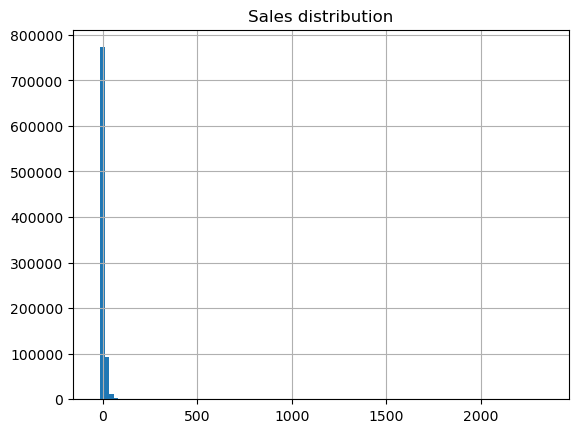

In [30]:
sales['pr_sales_in_units'].hist(bins=100)
plt.title('Sales distribution');

In [31]:
sales['avg_price'] = sales['pr_sales_in_rub'] / sales['pr_sales_in_units']
sales.head(10)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,total_promo_diff_in_units,total_promo_diff_in_rub,avg_price
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0,0.0,0.0,165.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0,4.0,196.0,49.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0,1.0,78.0,78.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0,0.0,0.0,inf
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0,1.0,161.0,161.0
5,42a0e188f5033bc65bf8d78622277c4e,3474f0e025c7deb7e127a35763bc5512,2022-11-03,0,3.0,0.0,123.0,0.0,3.0,123.0,41.0
6,f7e6c85504ce6e82442c770f7c8606f0,b75c7cbf7accdaea8a1a14781bb29870,2023-02-15,0,0.0,0.0,171.0,0.0,0.0,171.0,inf
7,1ecfb463472ec9115b10c292ef8bc986,f5c4b08ce07d102062c2947967ad750e,2023-02-05,0,2.0,0.0,65.0,0.0,2.0,65.0,32.5
8,1ecfb463472ec9115b10c292ef8bc986,c2155d600945587d417fe45ba5bf6d57,2023-05-09,0,1.0,0.0,124.0,0.0,1.0,124.0,124.0
9,16a5cdae362b8d27a1d8f8c7b78b4330,de37768f69fca7176ecddcb7e2b320ac,2023-04-13,0,1.0,0.0,34.0,0.0,1.0,34.0,34.0


In [32]:
sales[(sales['pr_sales_in_units'] == 0) & (sales['pr_sales_in_rub'] != 0)]

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,total_promo_diff_in_units,total_promo_diff_in_rub,avg_price
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0,0.0,0.0,inf
6,f7e6c85504ce6e82442c770f7c8606f0,b75c7cbf7accdaea8a1a14781bb29870,2023-02-15,0,0.0,0.0,171.0,0.0,0.0,171.0,inf
27,42a0e188f5033bc65bf8d78622277c4e,cfb54b1ce12bb3f9b6b9e2ea0b57414b,2022-11-10,0,0.0,0.0,91.0,0.0,0.0,91.0,inf
28,f7e6c85504ce6e82442c770f7c8606f0,88d7313785c97631bf3df61e70636491,2022-11-30,0,0.0,0.0,79.0,0.0,0.0,79.0,inf
32,fa7cdfad1a5aaf8370ebeda47a1ff1c3,b610088ddf586449793d3c6da70d4c56,2023-02-26,0,0.0,0.0,83.0,0.0,0.0,83.0,inf
...,...,...,...,...,...,...,...,...,...,...,...
882978,fa7cdfad1a5aaf8370ebeda47a1ff1c3,a1f93a1aeb02759147d69276c70217db,2023-06-07,1,0.0,0.0,30.0,30.0,0.0,0.0,inf
882979,6364d3f0f495b6ab9dcf8d3b5c6e0b01,cda72490a16c471e7a192a956f476e95,2023-04-11,0,0.0,0.0,62.0,0.0,0.0,62.0,inf
882991,16a5cdae362b8d27a1d8f8c7b78b4330,7d945116ed12c2807d081df6f666ba37,2023-07-01,1,0.0,0.0,70.0,70.0,0.0,0.0,inf
883004,42a0e188f5033bc65bf8d78622277c4e,143f62003066d8d4cc33d3e9161d114d,2022-12-25,1,0.0,0.0,41.0,41.0,0.0,0.0,inf


66 тысяч строк, где продажи в штуках нулевые, а в рублях нет. Я думаю, это из-за округления: товара куплено меньше 0.5 - в штуках будет 0, а рубли с продажи есть

Для прогнозирования спроса нули нам подходят - они отражают очень низкий спрос. Но это портит расчет цен (деление на ноль). Исправим эти строки

In [33]:
sales['avg_price'] = sales['avg_price'].replace({np.inf: np.nan, -np.inf: np.nan})
sales.head(10)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,total_promo_diff_in_units,total_promo_diff_in_rub,avg_price
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0,0.0,0.0,165.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0,4.0,196.0,49.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0,1.0,78.0,78.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0,0.0,0.0,NaN
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0,1.0,161.0,161.0
5,42a0e188f5033bc65bf8d78622277c4e,3474f0e025c7deb7e127a35763bc5512,2022-11-03,0,3.0,0.0,123.0,0.0,3.0,123.0,41.0
6,f7e6c85504ce6e82442c770f7c8606f0,b75c7cbf7accdaea8a1a14781bb29870,2023-02-15,0,0.0,0.0,171.0,0.0,0.0,171.0,NaN
7,1ecfb463472ec9115b10c292ef8bc986,f5c4b08ce07d102062c2947967ad750e,2023-02-05,0,2.0,0.0,65.0,0.0,2.0,65.0,32.5
8,1ecfb463472ec9115b10c292ef8bc986,c2155d600945587d417fe45ba5bf6d57,2023-05-09,0,1.0,0.0,124.0,0.0,1.0,124.0,124.0
9,16a5cdae362b8d27a1d8f8c7b78b4330,de37768f69fca7176ecddcb7e2b320ac,2023-04-13,0,1.0,0.0,34.0,0.0,1.0,34.0,34.0


In [34]:
sales['avg_price'].describe()

count    816472.000000
mean        138.726821
std         127.117552
min           0.000000
25%          49.000000
50%         113.000000
75%         187.666667
max        4729.000000
Name: avg_price, dtype: float64

Интересно, откуда взялись нулевые цены. Для этого продажи в рублях должны быть 0, а в штуках нет (нет деления на ноль)

In [35]:
sales[(sales['pr_sales_in_units'] != 0) & (sales['pr_sales_in_rub'] == 0)]

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,total_promo_diff_in_units,total_promo_diff_in_rub,avg_price
30,f7e6c85504ce6e82442c770f7c8606f0,3474f0e025c7deb7e127a35763bc5512,2023-06-06,1,8.0,8.0,0.0,0.0,0.0,0.0,0.0
6313,53e19f3dbb211f20b20b45668303c1b6,ee21c04f96ab30a8b3ca761e57e016ca,2022-11-09,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7432,c81e728d9d4c2f636f067f89cc14862c,90252502ab29331e94fd3113f11c58e0,2022-12-27,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0
8153,f7e6c85504ce6e82442c770f7c8606f0,4e3d5c9fab3fc51a4857846fea3d2e57,2022-12-19,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8931,f7e6c85504ce6e82442c770f7c8606f0,0f152427918d29bb1081834c1d375a48,2022-10-28,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
876801,1ecfb463472ec9115b10c292ef8bc986,525526d5b2169462195c44d49fff4a44,2022-10-22,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
878163,fa7cdfad1a5aaf8370ebeda47a1ff1c3,27e8978c9e8b7146c462feb7d24f5637,2022-10-27,1,9.0,9.0,0.0,0.0,0.0,0.0,0.0
882360,6364d3f0f495b6ab9dcf8d3b5c6e0b01,2dc922d957188fb51dd2bd50ec9b555a,2022-10-29,1,12.0,12.0,0.0,0.0,0.0,0.0,0.0
882380,f7e6c85504ce6e82442c770f7c8606f0,9da31b9d3cf407cd724c65b7dfed00ee,2022-11-27,1,3.0,3.0,0.0,0.0,0.0,0.0,0.0


In [36]:
sales[(sales['pr_sales_in_units'] != 0) & (sales['pr_sales_in_rub'] == 0)]['pr_sales_type_id'].mean()

0.8528301886792453

795 таких случаев, когда количество товара ненулевое, но выручка за него ноль. Это может быть ошибкой. Или нет

85% таких кейсов по промо, но не все. Можно продположить, что это что-то по акции дали бесплатно. Но счиатать ли тогда такие продажи спросом?

In [37]:
one_item_one_store = sales[(sales['st_id'] == 'c81e728d9d4c2f636f067f89cc14862c') & (sales['pr_sku_id'] == 'c7b711619071c92bef604c7ad68380dd')]
one_item_one_store.shape

(634, 11)

In [38]:
one_item_one_store = sales[(sales['st_id'] == '42a0e188f5033bc65bf8d78622277c4e') & (sales['pr_sku_id'] == '68f441429e73dbd33b81f95da31576e9')]
one_item_one_store.shape

(225, 11)

In [39]:
one_item_one_store = sales[(sales['st_id'] == '1ecfb463472ec9115b10c292ef8bc986') & (sales['pr_sku_id'] == '22988026fe85fde60d8bf777ab6bc3b4')]
one_item_one_store.shape

(304, 11)

In [40]:
one_item_one_store = sales[(sales['st_id'] == '42a0e188f5033bc65bf8d78622277c4e') & (sales['pr_sku_id'] == '8e887cf8e64ab8e7173701a979476567')]
one_item_one_store.shape

(193, 11)

Я хотела посмотреть на историю продаж одного товара в одном магазине (из чего нам делать временной ряд). Количество наблюдений не одинаковое. Где меньше года, мне понятно: некоторых дней нет. А что значит 600+, когда у нас уникальных дней 350??

In [41]:
one_item_one_store = sales[(sales['st_id'] == 'c81e728d9d4c2f636f067f89cc14862c') & (sales['pr_sku_id'] == 'c7b711619071c92bef604c7ad68380dd')]
one_item_one_store = one_item_one_store.sort_values(by='date')
one_item_one_store.head(10)

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,total_promo_diff_in_units,total_promo_diff_in_rub,avg_price
543404,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-08-01,1,34.0,34.0,4642.0,4642.0,0.0,0.0,136.529412
842664,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-08-01,0,1.0,0.0,103.0,0.0,1.0,103.0,103.000000
868341,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-08-02,0,0.0,0.0,88.0,0.0,0.0,88.0,NaN
6214,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-08-02,1,35.0,35.0,4829.0,4829.0,0.0,0.0,137.971429
844310,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-08-03,1,24.0,24.0,3306.0,3306.0,0.0,0.0,137.750000
190493,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-08-04,1,3.0,3.0,393.0,393.0,0.0,0.0,131.000000
148773,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-08-04,0,22.0,0.0,3703.0,0.0,22.0,3703.0,168.318182
202149,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-08-05,0,31.0,0.0,5222.0,0.0,31.0,5222.0,168.451613
620710,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-08-05,1,3.0,3.0,399.0,399.0,0.0,0.0,133.000000
613072,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-08-06,1,3.0,3.0,533.0,533.0,0.0,0.0,177.666667


Понятно. В дни, когда есть промо, создается отдельная строка. Продажи по промо и без пишутся в разные строки

Из-за того, что штуки округлены, расчетная цена неадекватна. Пример: по промо продано 34 штуки со средней ценой 136. По полной цене в тот же день - 1 штука за 103 рубля. Это могло получиться, если эта одна штука на самом деле 0.6 (весовой товар)

Вообще малые продажи сильно искажают расчетную цену. Если посмотреть только на дни, когда продаж много, становится видно, что наш товар стоит около 168 без скидки и 137 - со скидкой

Было бы хорошо каким-то образом считать цены только по наблюдениям, где много штук, а где мало, заполнить скользящим средним

In [42]:
zero_sales = sales[(sales['pr_sales_in_rub'] == 0) & (sales['pr_sales_in_units'] == 0) & (sales['pr_promo_sales_in_rub'] == 0) & (sales['pr_promo_sales_in_units'] == 0)]

In [43]:
zero_sales.shape

(454, 11)

Мое предположение было в том, что если продаж в какой-то день нет, то система вообще не фиксирует пару товар-магазин. Тогда пропущенные даты для получения целого временного ряда можно было бы заполнить нулями. Но есть 454 наблюдения с нулевыми продажами

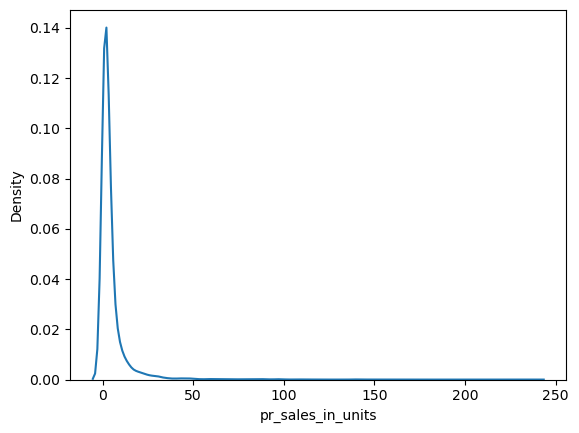

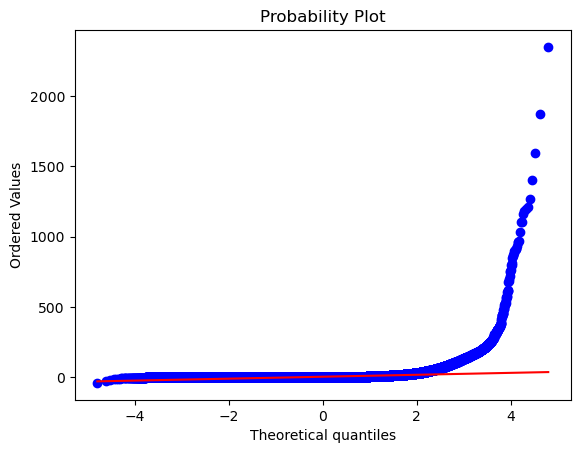

In [44]:
#histogram and normal probability plot
from scipy import stats

sns.kdeplot(sales['pr_sales_in_units'].sample(10000));
fig = plt.figure()
res = stats.probplot(sales['pr_sales_in_units'], plot=plt)

c:\Users\Lev\miniconda3\envs\ds\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Lev\miniconda3\envs\ds\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


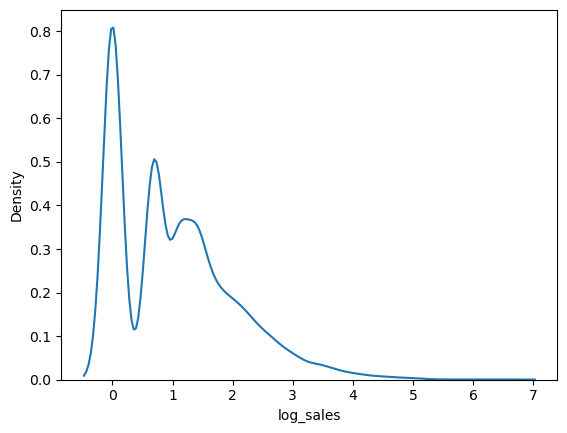

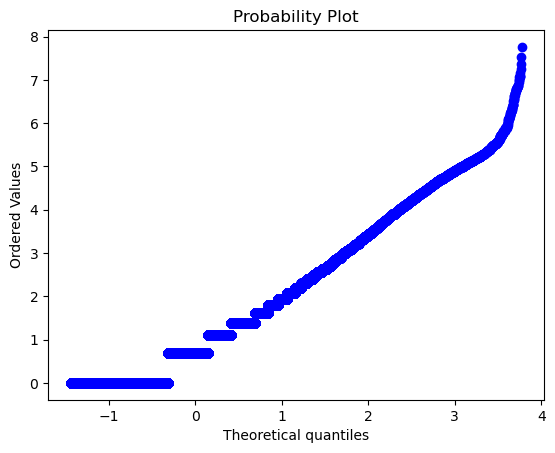

In [45]:
sales['log_sales'] = np.log(sales['pr_sales_in_units'])

sns.kdeplot(sales['log_sales'].sample(10000));
fig = plt.figure()
res = stats.probplot(sales['log_sales'], plot=plt)

c:\Users\Lev\miniconda3\envs\ds\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Lev\miniconda3\envs\ds\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


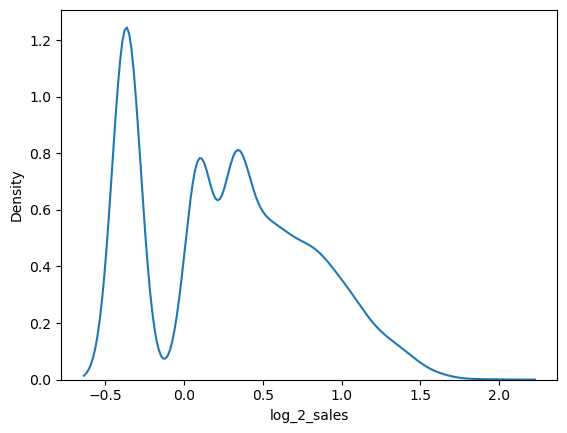

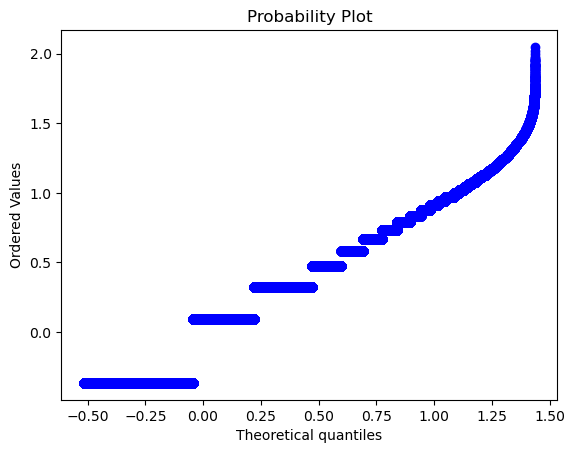

In [46]:
sales['log_2_sales'] = np.log(sales['log_sales'])

sns.kdeplot(sales['log_2_sales'].sample(10000));
fig = plt.figure()
res = stats.probplot(sales['log_2_sales'], plot=plt)

Логарифмирование, даже дважды (не уверенна, что так делают) не делает распределение продаж нормальным

In [47]:
sales['store_item'] = sales['st_id'].str.cat(sales['pr_sku_id'], sep='-')
sales['store_item'].nunique()

6244

In [64]:
sample_sub['store_item'] = sample_sub['st_id'].str.cat(sample_sub['pr_sku_id'], sep='-')
sample_sub['store_item'].nunique()

3121

В датафрейме oneline объединены продажи по промо и без по одной паре товар-магазин за один день

In [49]:
oneline = sales.groupby(['store_item', 'date'])[['pr_sales_in_units', 'pr_sales_in_rub', 'pr_promo_sales_in_units', 'pr_promo_sales_in_rub']].sum()
oneline.shape

(700962, 4)

In [52]:
by_pair = oneline.groupby('store_item')[['pr_sales_in_units', 'pr_sales_in_rub']].agg(['sum', 'count'])
all_sales = by_pair[('pr_sales_in_rub', 'sum')].sum()
by_pair['all_sales_share'] = by_pair[('pr_sales_in_rub', 'sum')] / all_sales * 100
by_pair.sort_values([('pr_sales_in_rub', 'sum')], ascending=False).head(50)

pr_sales_in_units        \
                                                                 sum count   
store_item                                                                   
16a5cdae362b8d27a1d8f8c7b78b4330-4e824a65fbd01f...           15717.0   352   
fa7cdfad1a5aaf8370ebeda47a1ff1c3-c0e3f3bd815a86...           32923.0   352   
16a5cdae362b8d27a1d8f8c7b78b4330-4a04104f09c6ea...            6556.0   347   
16a5cdae362b8d27a1d8f8c7b78b4330-6e456038d55730...           12008.0   313   
16a5cdae362b8d27a1d8f8c7b78b4330-ae9aebfac21c0f...           15836.0   335   
42a0e188f5033bc65bf8d78622277c4e-c0e3f3bd815a86...           25856.0   352   
f7e6c85504ce6e82442c770f7c8606f0-4695acecbef473...           24555.0   352   
16a5cdae362b8d27a1d8f8c7b78b4330-c0e3f3bd815a86...           22423.0   352   
c81e728d9d4c2f636f067f89cc14862c-777d21d980f82a...           10053.0   334   
6364d3f0f495b6ab9dcf8d3b5c6e0b01-c0e3f3bd815a86...           20988.0   349   
c81e728d9d4c2f636f067f89cc14862c-0a2090e24b6ae6...           19296.0   333   
6364d3f0f495b6ab9dcf8d3b5c6e0b01-4b083e10f6cd2f...           25122.0   324   
6364d3f0f495b6ab9dcf8d3b5c6e0b01-5fb6bfa7b7d9a4...           14961.0   336   
42a0e188f5033bc65bf8d78622277c4e-8cad09283d1d6c...            4882.0   132   
c81e728d9d4c2f636f067f89cc14862c-c0e3f3bd815a86...           15732.0   352   
c81e728d9d4c2f636f067f89cc14862c-20d9b4bfd4b672...           42088.0   278   
f7e6c85504ce6e82442c770f7c8606f0-4b083e10f6cd2f...           21972.0   341   
42a0e188f5033bc65bf8d78622277c4e-5fb6bfa7b7d9a4...           13398.0   339   
f7e6c85504ce6e82442c770f7c8606f0-6e456038d55730...            7375.0   330   
c81e728d9d4c2f636f067f89cc14862c-2e277351c5cfe6...            7473.0   330   
c81e728d9d4c2f636f067f89cc14862c-c24c65259d90ed...           10433.0   352   
16a5cdae362b8d27a1d8f8c7b78b4330-67797f1f0f02ec...           10530.0   352   
42a0e188f5033bc65bf8d78622277c4e-4a04104f09c6ea...            3222.0   325   
42a0e188f5033bc65bf8d78622277c4e-54cc81ad9eadc5...            6597.0   204   
f7e6c85504ce6e82442c770f7c8606f0-5fb6bfa7b7d9a4...           11019.0   295   
f7e6c85504ce6e82442c770f7c8606f0-ae9aebfac21c0f...            8404.0   348   
42a0e188f5033bc65bf8d78622277c4e-0a68dd43c227b0...           12835.0   330   
16a5cdae362b8d27a1d8f8c7b78b4330-c24c65259d90ed...            8489.0   345   
fa7cdfad1a5aaf8370ebeda47a1ff1c3-6e456038d55730...            6126.0   315   
42a0e188f5033bc65bf8d78622277c4e-4e824a65fbd01f...            3201.0   344   
c81e728d9d4c2f636f067f89cc14862c-79a7b3ad0fea53...            3960.0   286   
42a0e188f5033bc65bf8d78622277c4e-63b837c9a3fd36...            7154.0   296   
c81e728d9d4c2f636f067f89cc14862c-17e0ce48c87a88...            1644.0   275   
c81e728d9d4c2f636f067f89cc14862c-fd55c4022acef4...           27146.0   269   
42a0e188f5033bc65bf8d78622277c4e-c7b711619071c9...            9935.0   352   
16a5cdae362b8d27a1d8f8c7b78b4330-0ad7341f0f7f63...            4810.0   297   
c81e728d9d4c2f636f067f89cc14862c-c7b711619071c9...            8007.0   352   
16a5cdae362b8d27a1d8f8c7b78b4330-c7b711619071c9...            8496.0   352   
c81e728d9d4c2f636f067f89cc14862c-67797f1f0f02ec...            8600.0   352   
16a5cdae362b8d27a1d8f8c7b78b4330-0a68dd43c227b0...            9744.0   316   
f7e6c85504ce6e82442c770f7c8606f0-0a68dd43c227b0...            9501.0   312   
16a5cdae362b8d27a1d8f8c7b78b4330-5aa2f6e00873f8...           16735.0   351   
42a0e188f5033bc65bf8d78622277c4e-b749c085963d0f...            8447.0   332   
fa7cdfad1a5aaf8370ebeda47a1ff1c3-ae0ea26efd73c8...            6360.0   309   
42a0e188f5033bc65bf8d78622277c4e-67797f1f0f02ec...            7612.0   352   
c81e728d9d4c2f636f067f89cc14862c-a70a600d7c593c...            1515.0   247   
c81e728d9d4c2f636f067f89cc14862c-225de5ef23fbfa...            5749.0   349   
f7e6c85504ce6e82442c770f7c8606f0-c24c65259d90ed...            6097.0   352   
c81e728d9d4c2f636f067f89cc14862c-d23f1d1cd4efe7...            5930.0   30

In [84]:
top50 = by_pair.sort_values([('pr_sales_in_rub', 'sum')], ascending=False).head(50)
top50['all_sales_share'].sum()

19.16335772681561

rare - товары, которые продавались в общей сложности меньше двух недель

In [80]:
rare = by_pair[by_pair[('pr_sales_in_rub', 'count')] <= 14]
rare.shape

(1704, 5)

In [71]:
check_sets(sales, 'store_item', sample_sub, 'store_item', 'train', 'sub')

in both files: 2995
in train but not in sub: 3249
in sub but not in train: 126


In [81]:
check_sets(rare.reset_index(), 'store_item', sample_sub, 'store_item', 'rare', 'sub')

in both files: 192
in rare but not in sub: 1512
in sub but not in rare: 2929


In [82]:
check_sets(top50.reset_index(), 'store_item', sample_sub, 'store_item', 'rare', 'sub')

in both files: 50
in rare but not in sub: 0
in sub but not in rare: 3071


В тестовой выборке (можно я так буду называть файл, который требуется заполнить предсказаниями?):

* 3121 уникальная пара товар-магазин
* из них 2995 пар есть в обучающей выборке
* из них 192 продавались за год в общей сложности менее 2 недель (редкие)
* 126 пар нет в обучающих данных
* топ-50 пар товар-магазин все попадают в тестовую выборку
* продажи этих топ-50 составляют 20% от общей выручки всех магазинов за все товары

- сгруппировать (суммировать) по магазину-товару-дате, чтобы объединить продажи с промо и без в одну строку

- убрать отрицательные продажи (по 4 столбцам) - обнулить

- убрать продажи, когда в штуках ноль, а в рублях нет, или наоборот - обнулить

- сделать копию датасета со столбцами: товар-магазин, дата, общие продажи

- заполнить пропущенные дни нулями

- удалить комбинации, где много нулей

* дропнуть два закрытых магазина

* убедиться что все пары из предикта есть в обучающей выборке

* проверить наименее частотные пары по каунту - вдруг их нет в предикте

* оформить проверку взаимного вхождения для двух множеств в функцию check_sets

In [85]:
zero_units = sales[(sales['pr_sales_in_units'] == 0) & (sales['pr_sales_in_rub'] != 0)][['pr_sku_id', 'pr_sales_in_units', 'pr_sales_in_rub']]

In [86]:
zero_units = zero_units.merge(items[['pr_sku_id', 'pr_uom_id']], on='pr_sku_id', how='left')

In [87]:
zero_units.shape

(66089, 4)

In [91]:
zero_units['pr_uom_id'].value_counts()

pr_uom_id
1     66088
17        1
Name: count, dtype: int64

Отлично, 1 - килограммы, 17 - штуки. А нули получаются из-за округления вниз

In [94]:
zero_rubs = sales[(sales['pr_sales_in_units'] != 0) & (sales['pr_sales_in_rub'] == 0)][['pr_sku_id', 'date', 'pr_sales_in_units', 'pr_sales_in_rub']]

In [95]:
zero_rubs.shape

(795, 4)

In [98]:
zero_rubs['date'].value_counts().sort_index()

date
2022-08-03    1
2022-08-05    1
2022-08-06    1
2022-08-08    3
2022-08-09    2
             ..
2023-07-13    1
2023-07-14    1
2023-07-15    1
2023-07-16    1
2023-07-18    2
Name: count, Length: 235, dtype: int64

Отвергаем гипотезу, что это какая-то акция: товары проданы, а цена ноль. Эти случаи равномерно распределены по всему году наблюдений